In [1]:
#Wiki updates Deaths_in_2020 and then transfer is to months

import urllib.request
import matplotlib.pyplot as plt 
from bs4 import BeautifulSoup
from datetime import date

<h3><span class="mw-headline" id="8">8</span></h3>
[2020, 'April', '8']
<h3><span class="mw-headline" id="7">7</span></h3>
[2020, 'April', '7']
<h3><span class="mw-headline" id="6">6</span></h3>
[2020, 'April', '6']
<h3><span class="mw-headline" id="5">5</span></h3>
[2020, 'April', '5']
<h3><span class="mw-headline" id="4">4</span></h3>
[2020, 'April', '4']
<h3><span class="mw-headline" id="3">3</span></h3>
[2020, 'April', '3']
<h3><span class="mw-headline" id="2">2</span></h3>
[2020, 'April', '2']
<h3><span class="mw-headline" id="1">1</span></h3>
[2020, 'April', '1']


Text(0, 0.5, '% Covid-19 Deaths')

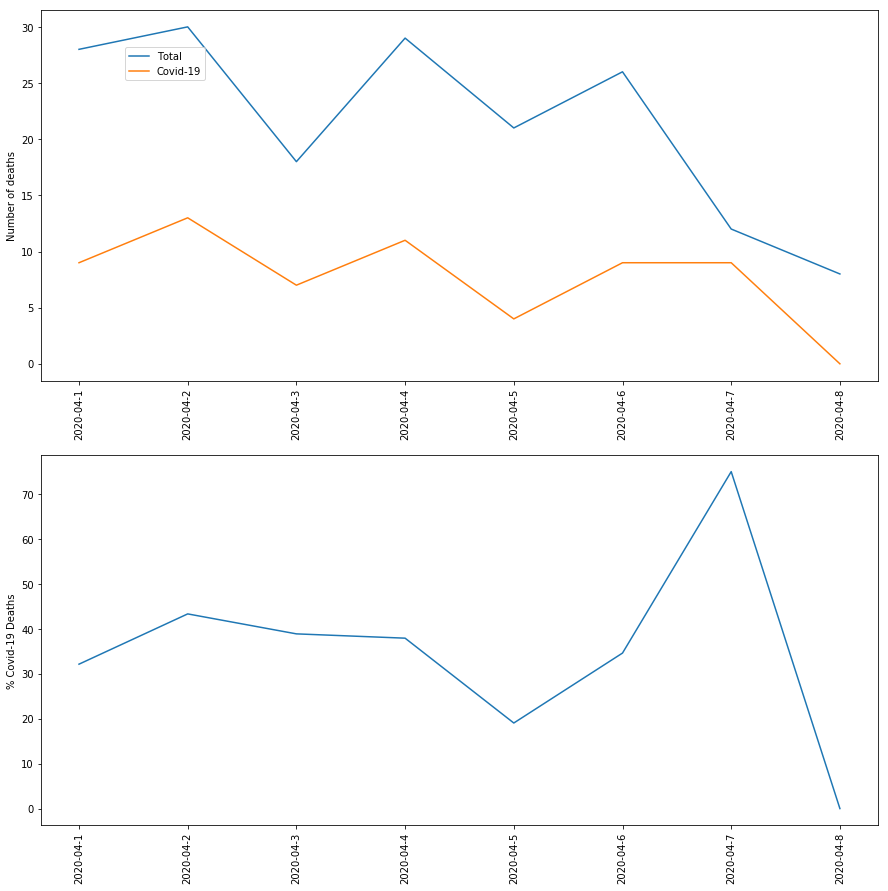

In [12]:
#This part is still valid for april
url = 'https://en.wikipedia.org/wiki/Deaths_in_2020'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")
body = soup.findAll('div', {"class": "mw-parser-output"})

ddate = [2020,'April',0]

xdate = []
ydeaths = []
ycovid = []

for row in body[0].findAll(['h3','ul'])[2:]:
    
    if row.name == 'h3':
        print(row)
        ddate[2] = row.text
        print(ddate)
        xdate += [to_date(ddate)]
    
    elif row.name == 'ul':
        tot = 0
        cov = 0
        for person in row.findAll('li'):
            tot += 1
            if "COVID" in person.text:
                cov += 1
        ydeaths += [tot]
        ycovid += [cov]
        
        if ddate == [2020,'April','1']:
            break

plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
plt.plot(xdate[::-1], ydeaths[::-1], label='Total')
plt.plot(xdate[::-1], ycovid[::-1],label='Covid-19')
plt.xticks(rotation='vertical')
plt.ylabel('Number of deaths')
plt.legend(bbox_to_anchor=(0.1,0.9), loc='upper left', borderaxespad=0.)

plt.subplot(2, 1, 2)
plt.plot(xdate[::-1], [ycovid[i]/ydeaths[i]*100 for i in range(len(xdate))][::-1] )
plt.xticks(rotation='vertical')
plt.ylabel('% Covid-19 Deaths')

In [4]:
def mton (month):
    mton_d = {'January':'01','February':'02','March':'03','April':'04','May':'05','June':'06'
     ,'July':'07','August':'08','September':'09','October':'10','November':'11','December':'12'}
    return(mton_d[month])

def to_date (d):
    return(str(d[0])+'-'+mton(d[1])+'-'+str(d[2]))

def days_in (month):
    days_d = {'January':'31','February':'29','March':'31','April':'30','May':'31','June':'30'
     ,'July':'31','August':'31','September':'30','October':'31','November':'30','December':'31'}
    return(days_d[month])

class DeathsByMonth:
    def __init__(self, month):
        self.month = month
        self.url = 'https://en.wikipedia.org/wiki/Deaths_in_' + month + '_2020'
        self.page = urllib.request.urlopen(self.url)
        self.soup = BeautifulSoup(self.page, "lxml")
        self.body = self.soup.find('div',{'id': 'mw-content-text'})
        self.xdate = []
        self.ydeaths = []
        self.ycovid = []
        
        date = [2020,self.month,0]
        for row in self.body.findAll(['h3','ul'])[2:]:
            if row.name == 'h3':
                date[2] = row.text[:-6]
                self.xdate += [to_date(date)]
            elif row.name == 'ul':
                tot = 0
                cov = 0
                for person in row.findAll('li'):
                    tot += 1
                    if "COVID" in person.text:
                        cov += 1
                self.ydeaths += [tot]
                self.ycovid += [cov]
                if date == [2020,self.month,days_in(self.month)]:
                    break
    def plot_summary(self):
        plt.figure(figsize=(15,15))
        plt.subplot(2, 1, 1)
        plt.plot(self.xdate, self.ydeaths, label='Total')
        plt.plot(self.xdate, self.ycovid, label='Covid-19')
        plt.xticks(rotation='vertical')
        plt.ylabel('Number of deaths')
        plt.legend(bbox_to_anchor=(0.1,0.9), loc='upper left', borderaxespad=0.)
        plt.subplot(2, 1, 2)
        plt.plot(self.xdate, [self.ycovid[i]/self.ydeaths[i]*100 for i in range(len(self.xdate))] )
        plt.xticks(rotation='vertical')
        plt.ylabel('% Covid-19 Deaths')

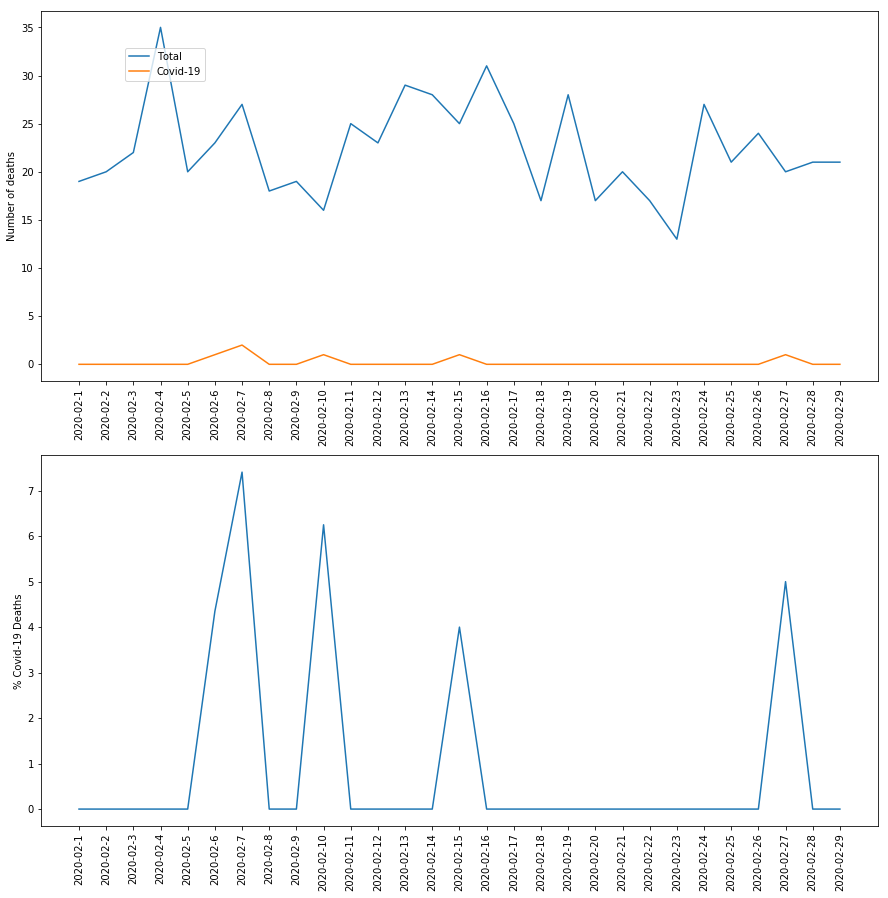

In [13]:
february = DeathsByMonth('February')
february.plot_summary()

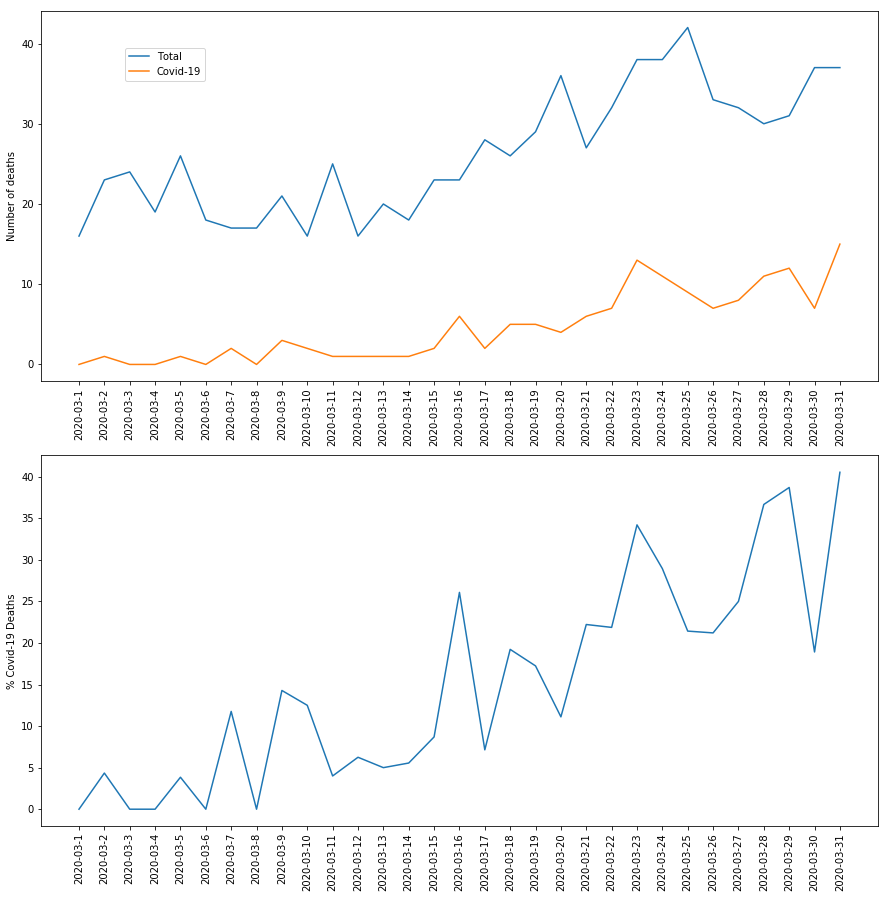

In [14]:
march = DeathsByMonth('March')
march.plot_summary()

In [7]:
plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
plt.plot(xdate[::-1], ydeaths[::-1], label='Total')
plt.plot(xdate[::-1], ycovid[::-1],label='Covid-19')
plt.xticks(rotation='vertical')
plt.ylabel('Number of deaths')
plt.legend(bbox_to_anchor=(0.1,0.9), loc='upper left', borderaxespad=0.)

['2020-04-8',
 '2020-04-7',
 '2020-04-6',
 '2020-04-5',
 '2020-04-4',
 '2020-04-3',
 '2020-04-2',
 '2020-04-1']

In [17]:
february.xdate+march.xdate+xdate[::-1]

['2020-02-1',
 '2020-02-2',
 '2020-02-3',
 '2020-02-4',
 '2020-02-5',
 '2020-02-6',
 '2020-02-7',
 '2020-02-8',
 '2020-02-9',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-1',
 '2020-03-2',
 '2020-03-3',
 '2020-03-4',
 '2020-03-5',
 '2020-03-6',
 '2020-03-7',
 '2020-03-8',
 '2020-03-9',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-28',
 '2020-03-29',
 '2020-03-30',
 '2020-03-31',
 '2020-04-1',
 '2020-04-2',
 '2020-04-3',
 '2020-04-4',
 '2020-04-5',
 '2020-04-6',
 '2020-04-7',
 '2020-04-8']

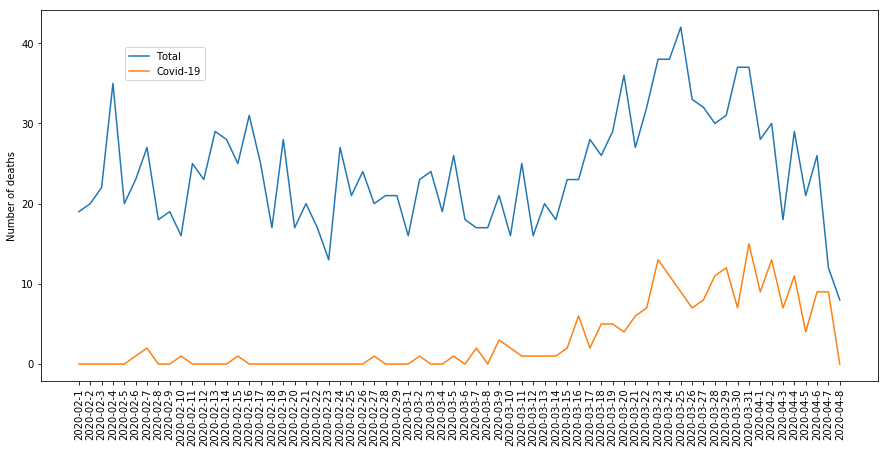

In [20]:
plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
plt.plot(february.xdate+march.xdate+xdate[::-1], february.ydeaths+march.ydeaths+ydeaths[::-1], label='Total')
plt.plot(february.xdate+march.xdate+xdate[::-1], february.ycovid+march.ycovid+ycovid[::-1],label='Covid-19')
plt.xticks(rotation='vertical')
plt.ylabel('Number of deaths')
plt.legend(bbox_to_anchor=(0.1,0.9), loc='upper left', borderaxespad=0.)